In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('C:\\Users\\Admin\\Downloads\\ACB.csv')

# Tạo cột mới là giá cổ phiếu trong 30 ngày tiếp theo
df['Next_Close'] = df['Close'].shift(-30)

# Loại bỏ các dòng có giá trị thiếu
df = df.dropna()


In [3]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [4]:
df['Close'] = df['Close'].replace({',': ''}, regex=True).astype(float)
df['Next_Close'] = df['Next_Close'].replace({',': ''}, regex=True).astype(float)


In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [6]:
model = LinearRegression()
model.fit(train_df['Close'].values.reshape(-1, 1), train_df['Next_Close'])


LinearRegression()

In [7]:
predictions = model.predict(test_df['Close'].values.reshape(-1, 1))

# Đánh giá mô hình
mae = mean_absolute_error(test_df['Next_Close'], predictions)
mape = mean_absolute_percentage_error(test_df['Next_Close'], predictions)
rmse = np.sqrt(mean_squared_error(test_df['Next_Close'], predictions))

print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'RMSE: {rmse}')

MAE: 1272.1848024822357
MAPE: 0.07502894481137379
RMSE: 1693.9239685049768


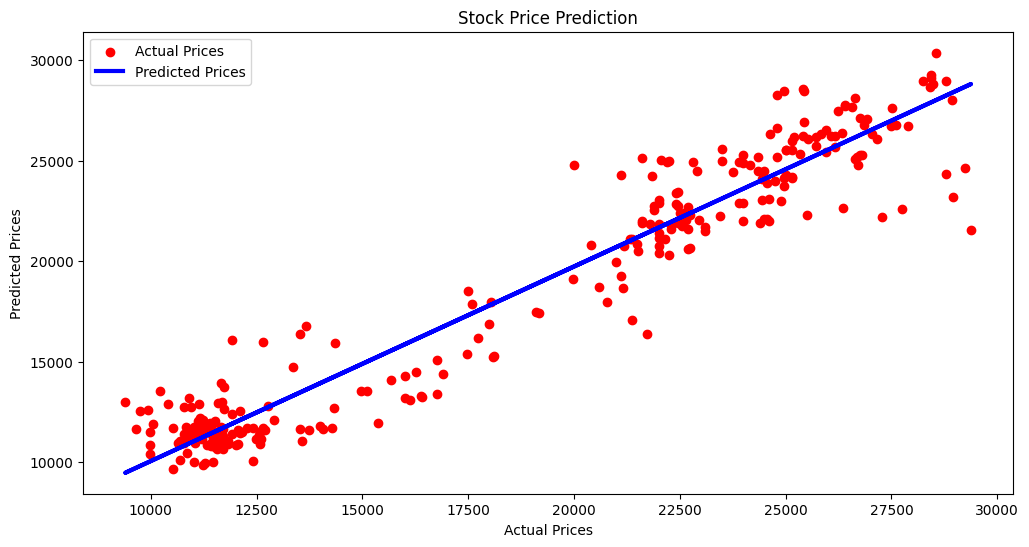

In [8]:
plt.figure(figsize=(12, 6))
plt.scatter(test_df['Close'], test_df['Next_Close'], color='red', label='Actual Prices')
plt.plot(test_df['Close'], predictions, color='blue', linewidth=3, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()